In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

C:\Users\Julian\AppData\Local\Temp\ipykernel_13408\306480344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = r"C:\Users\Julian\Desktop\Coding Stuff\KaggleCompetitions\House Prices\train.csv"
df = pd.read_csv(df)
df = df.drop(['Id'], axis=1)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

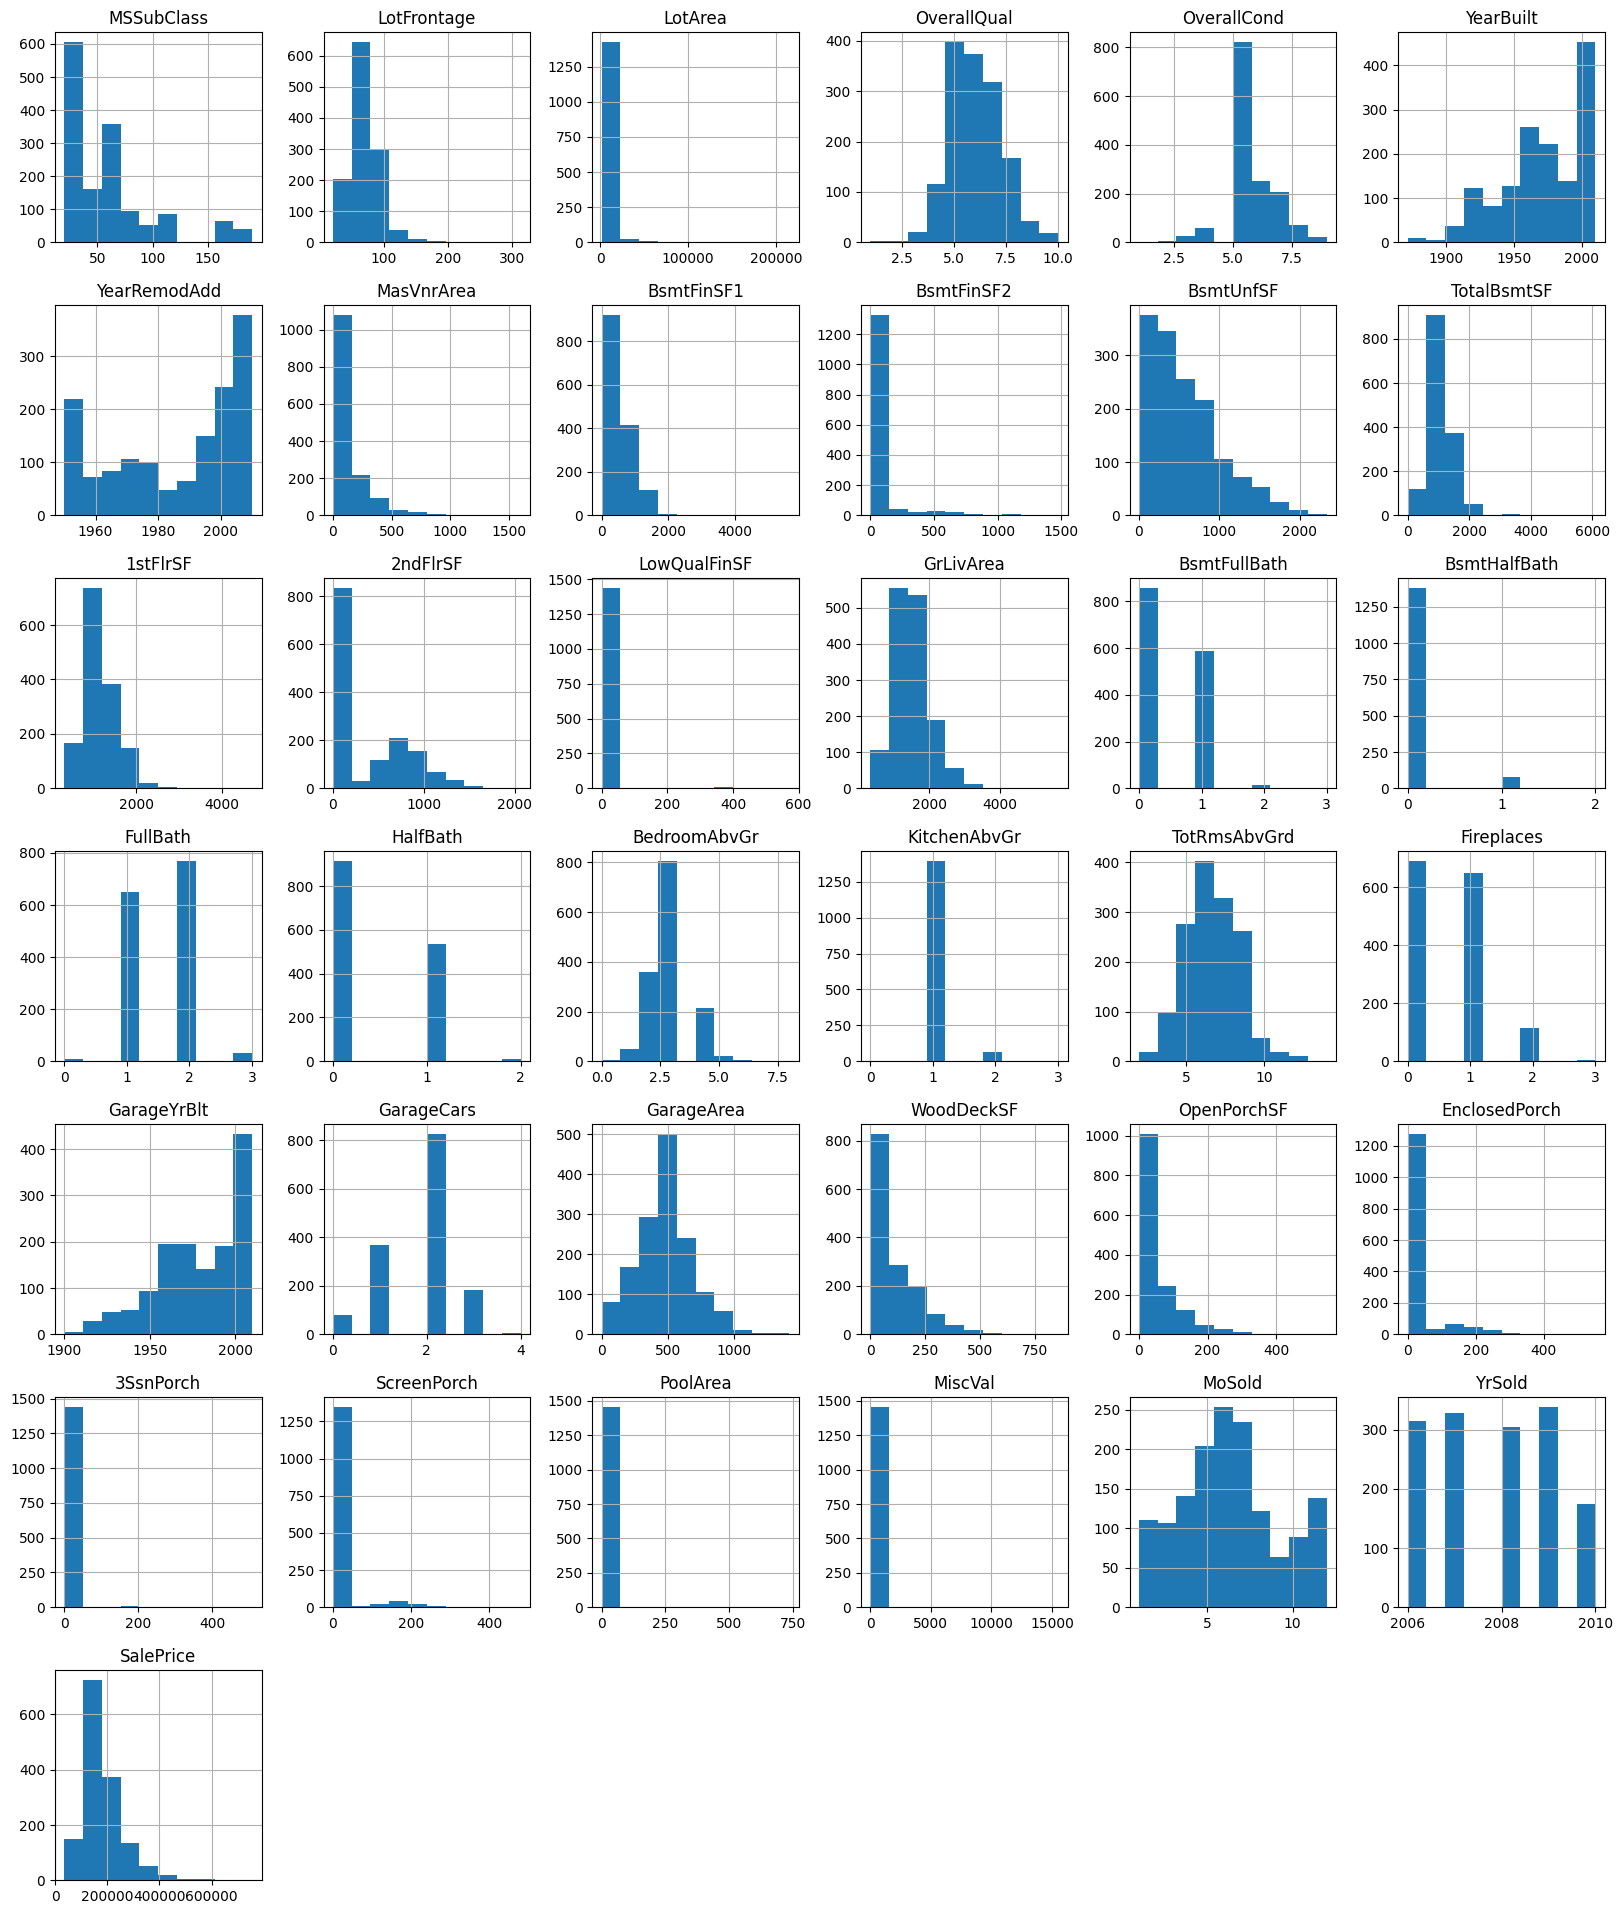

In [3]:
df.hist(figsize=(20,24))

In [4]:
NData = df.select_dtypes(include=[np.number])
CData = df.select_dtypes(exclude=[np.number])

<Axes: >

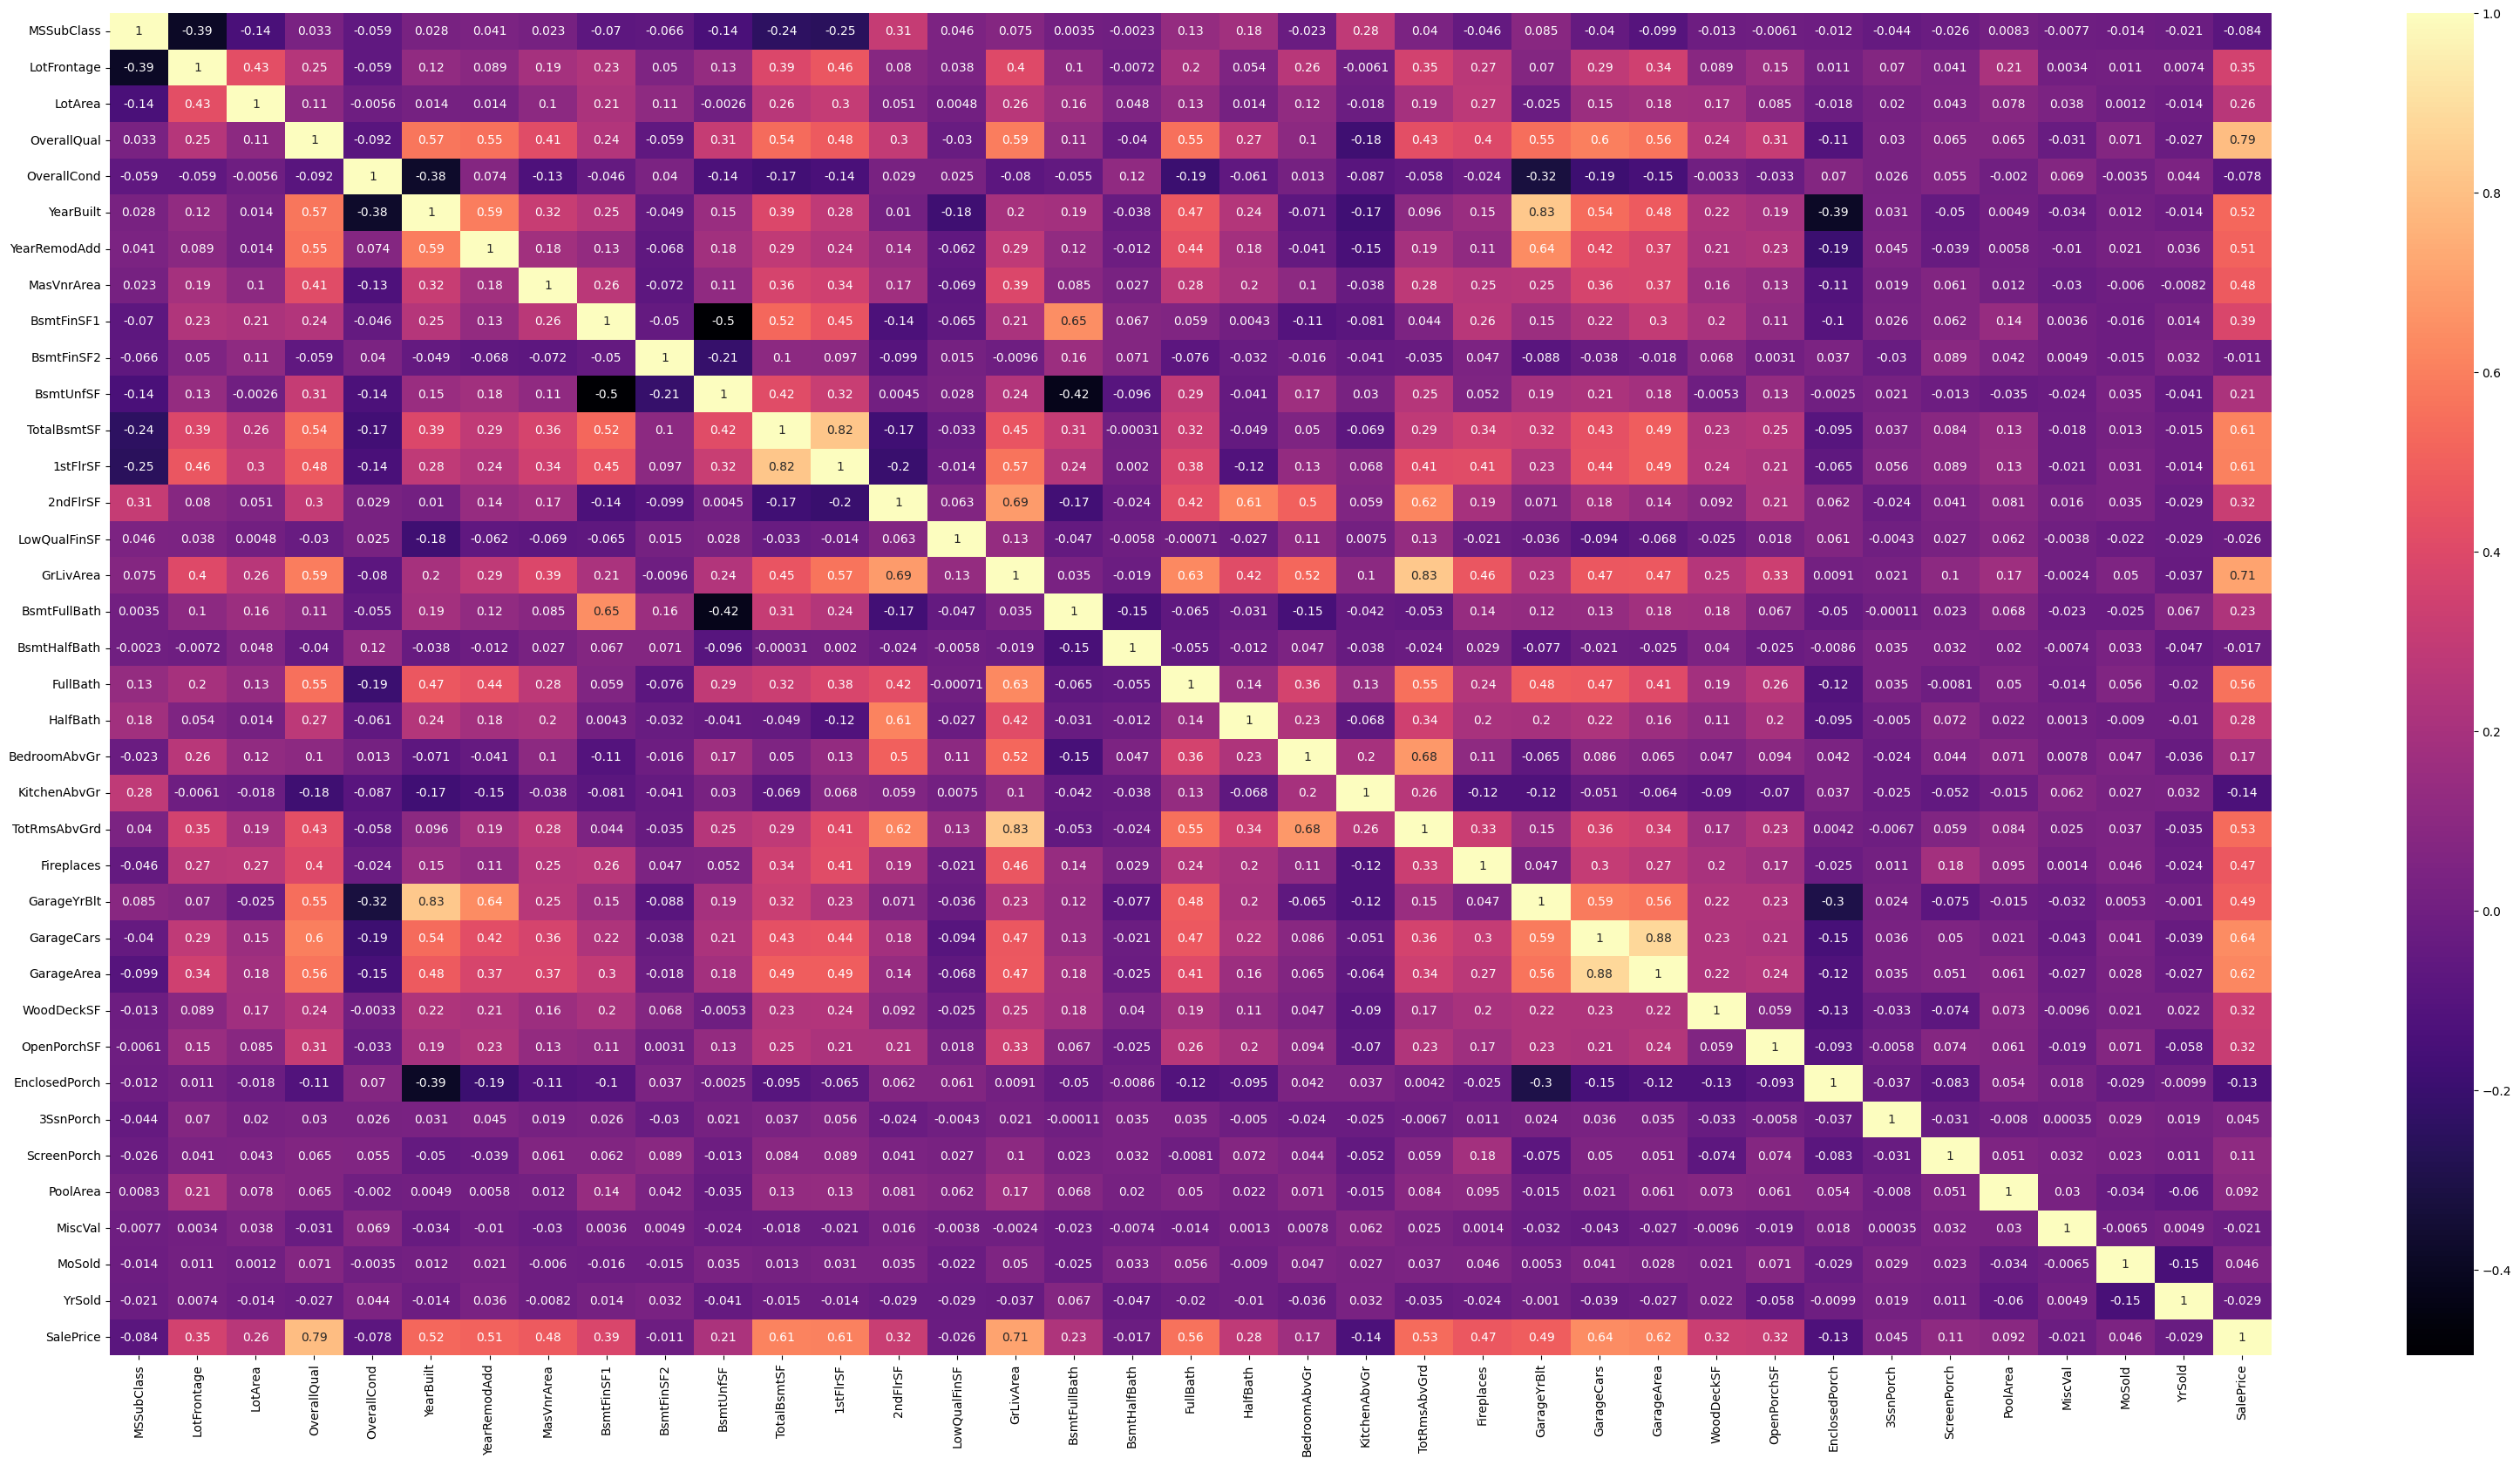

In [5]:
plt.figure(figsize=(40,20))
sns.heatmap(NData.corr(), annot=True, cmap='magma')

In [6]:
CData = pd.get_dummies(CData)

In [27]:
df = NData.join(CData)
# plt.figure(figsize=(200,240))
# sns.heatmap(df.corr(), annot=True, cmap="magma")

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

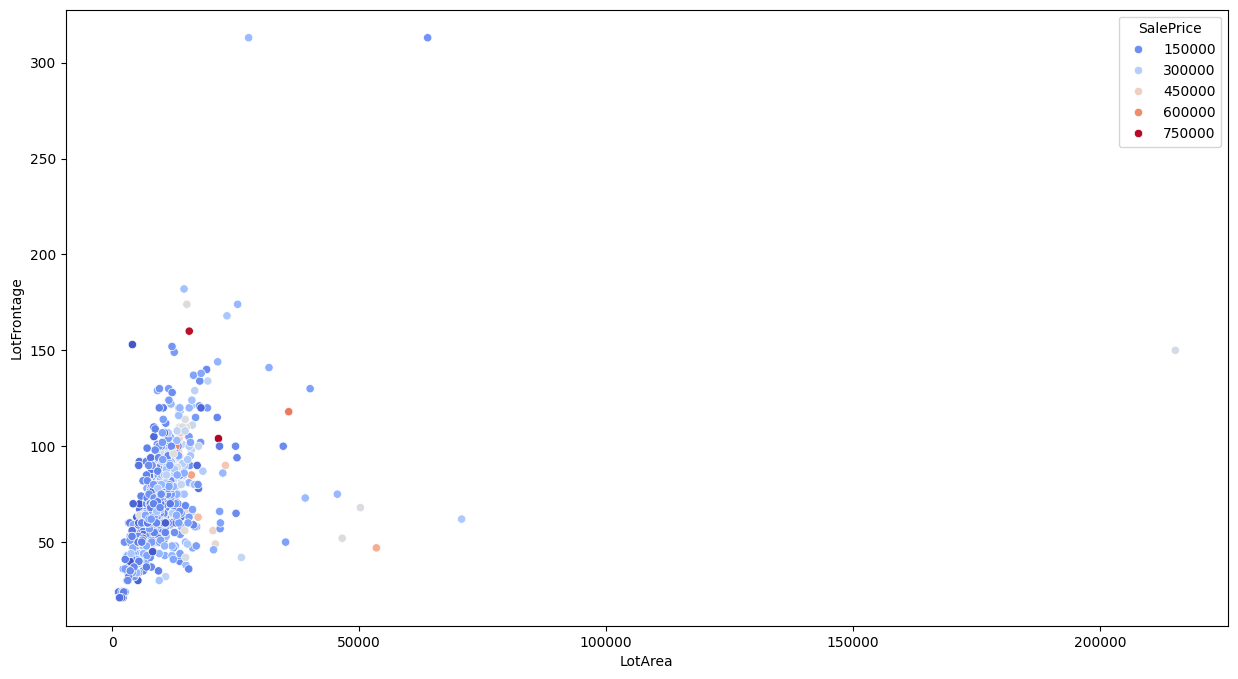

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LotArea', y='LotFrontage', data=df, hue='SalePrice', palette='coolwarm')

In [18]:
df = df.fillna(0)
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# THIS IS THE LINEAR REGRESSION PREDICTION
reg.score(X_test, y_test)

0.8641277609049204

In [21]:
# NOW GOING TO USE RANDOMFOREST
from sklearn.ensemble import RandomForestRegressor


In [22]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
# RANDOM FOREST PREDICTION BEFORE PARAMETER GRID (HYPER PARAMETER TUINING)
forest.score(X_test, y_test)

0.8627993348936154

In [24]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [160, 165, 175, 180, 185],
    "max_features": [12, 13, 14, 15, 16],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [12, 13, 14, 15, 16],
                         'n_estimators': [160, 165, 175, 180, 185]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=16, n_estimators=165)

In [26]:
best_forest.score(X_test, y_test)

0.8661689449822764